# Keras Reinforcement Learning Plays Flappy Bird
## Deep-Q Convolutional Neural Network

**Author:**   Whitney King

**Project:**  Udacity Machine Learning Engineer Capstone

**Date:**     4/12/2019


### Notebook Packages and Agent System Specs

In [2]:
%matplotlib inline
import sys
sys.path.append('game')
sys.path.append('images')
sys.path.append('learner')

import os
import csv
import json
import time
import inspect
import numpy as np
import pandas as pd
import pprint as pp
import seaborn as sb
from rl.memory import SequentialMemory, RingBuffer
from collections import *
import matplotlib.pyplot as plt
from game.flappy import Environment, render
from learner.flappy_util import Utility
from learner.flappy_inputs import Inputs
from learner.flappy_processor import FlappyProcessor
from learner.flappy_callback import FlappySession
from learner.flappy_beta import BetaFlapDQN, NeuralNet
import nbformat
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('classic')
import seaborn as sns
import pickle
from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
from IPython.display import Image, HTML, SVG, Math
from IPython.display import (
    display, display_html, display_png, display_svg
)
from tensorflow.python.client import device_lib
pp.pprint(device_lib.list_local_devices())

pygame 1.9.5
Hello from the pygame community. https://www.pygame.org/contribute.html
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5206967019151448081
,
 name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6646642770
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1902700068569299628
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


### User Defined Parameters

  -  **Agent** parameters contain generalized settings for the training session
    -  This is where max number of episodes to train is set, as well as the max length of each episode
  -  **Game** parameters fine tune the emulation environment when called
    -  Controls things like frames per second and clock tick rate, which help speed or slow each episode
  -  **Memory** parameters control the state size, batch size, and number of experiences in memory, as well as how often steps are saved to memory
  -  **Model** parameters are more complex and divided into further categories
    - Most parameters are general, and help define the structure of the model and how it learns
    - **Training** parameters enable very granular control over how the model trains, how it learns, and how it validates the learning
    -  **Save** parameters enable granular control over intervals and location for both saves and training logs

In [2]:
# Parameter values shown represent the values selected at training
inputs = Inputs()
inputs = inputs.params
pp.pprint(inputs)

{'agent': {'action_size': 2,
           'delta_clip': inf,
           'name': 'DeepQ',
           'session': {'episode': {'keep_gif_score': 4, 'max_time': 5},
                       'max_ep': 1000}},
 'game': {'difficulty': 'hard',
          'fps': 30,
          'name': 'FlappyBird',
          'target': 40,
          'tick': 8},
 'memory': {'batch_idx': None,
            'batch_size': 64,
            'interval': 4,
            'limit': 100000,
            'state_size': 8},
 'model': {'alpha': 0.025,
           'decay': 0.001,
           'double_dqn': True,
           'dueling_network': False,
           'dueling_type': 'max',
           'filter_size': 32,
           'gamma': 0.99,
           'momentum': 0.01,
           'noise_amp': 0.1,
           'optimizer': 'adadelta',
           'regulizer': 0.01,
           'save': {'ftype': '.json',
                    'log_n': 1,
                    'log_path': 'logs',
                    'save_full': True,
                    'save_json': True

### FlapPy Bird Emulator Source Code

In [11]:
# Run cell to display 
# render() method
%psource render

In [12]:
# Run cell to display 
# Environment() class initialization
%psource Environment.__init__

In [13]:
# Run cell to display 
# Environment.step() method
%psource Environment.step

In [14]:
# Run cell to display 
# Environment.get_random_pipe() method
%psource Environment.get_random_pipe

In [15]:
# Run cell to display 
# Environment.is_crash() method
%psource Environment.is_crash

In [16]:
# Run cell to display 
# Environment.pixel_collision() method
%psource Environment.pixel_collision

In [17]:
# Run cell to display 
# Environment.reset() method
%psource Environment.reset

In [18]:
# Run cell to display 
# Environment.close() method
%psource Environment.close

### Experience Replay Buffer Source Code

In [20]:
# Run cell to display 
# Keras-RL SequentialMemory() class initialization
%psource SequentialMemory

In [21]:
# Run cell to display 
# Keras-RL RingBuffer() class
%psource RingBuffer

### Model Source Code

In [3]:
# Run cell to display 
# NeuralNet()  class initialization
%psource NeuralNet.__init__

In [4]:
# Run cell to display 
# NeuralNet._create_model() initialization
%psource NeuralNet._create_model

### Neural Network Summary

In [3]:
import tensorflow as tf
from tensorflow import Session, InteractiveSession

sess = tf.Session()
model = NeuralNet(sess)
model.nn.summary()
sess.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4, 80, 80)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 40, 64)         327744    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 20, 64)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 20, 64)         256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 20, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 10, 128)        131200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 10, 128)        512       
__________

### Agent Source Code

In [28]:
# Run cell to display 
# BetaFlapDQN() class initialization
%psource BetaFlapDQN.__init__

In [27]:
# Run cell to display 
# load_saved_model_weights() method
%psource BetaFlapDQN.load_saved_model_weights

In [29]:
# Run cell to display 
# BetaFlapDQN.fit method
%psource BetaFlapDQN.fit

In [32]:
# Run cell to display 
# BetaFlapDQN.forward method
%psource BetaFlapDQN.forward

In [31]:
# Run cell to display 
# BetaFlapDQN.backward method
%psource BetaFlapDQN.backward

### Preprocessing and State Creation

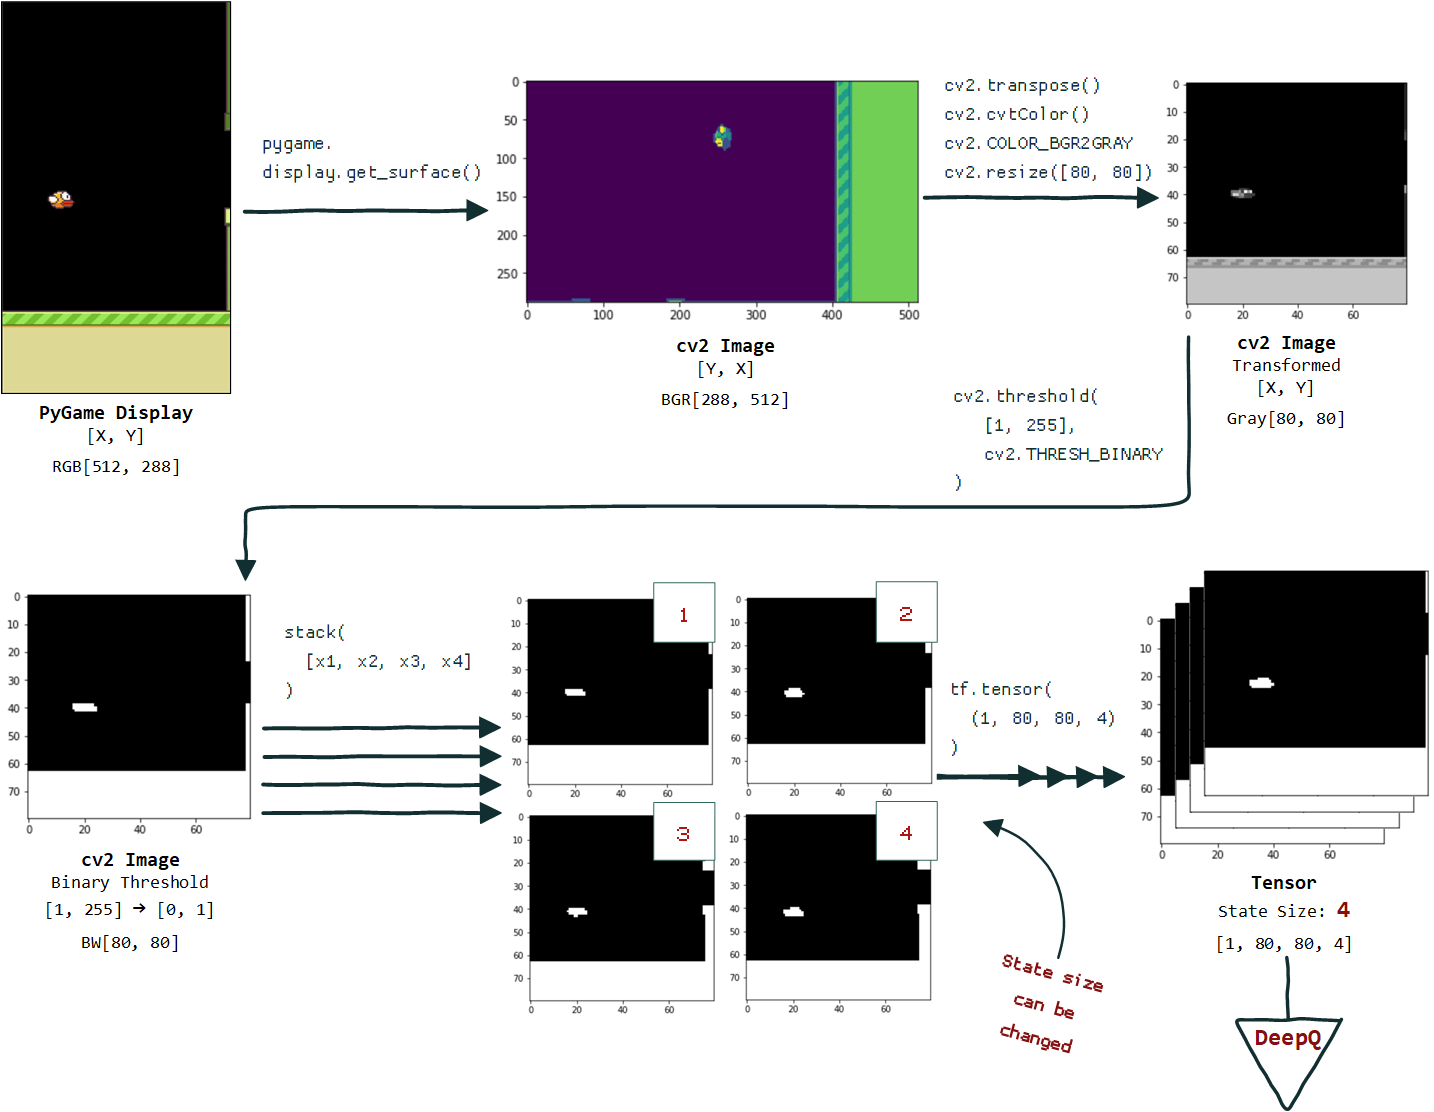

In [35]:
display(Image(filename='images/preprocessing_diagram.png'))

In [37]:
# Run cell to display 
# process_step() method
%psource FlappyProcessor.process_step

In [36]:
# Run cell to display 
# process_observation() method
%psource FlappyProcessor.process_observation

In [39]:
# Run cell to display 
# process_action() method
%psource FlappyProcessor.process_action

In [38]:
# Run cell to display 
# process_reward() method
%psource FlappyProcessor.process_reward

In [40]:
# Run cell to display 
# process_state_batch() method
%psource FlappyProcessor.process_state_batch

### Callbacks and Session Logging

In [43]:
# Run cell to display 
# FlappySession() class initialization
%psource FlappySession.__init__

In [46]:
# Run cell to display 
# on_train_begin() method
%psource FlappySession.on_train_begin

In [12]:
# Run cell to display 
# on_train_end() method
%psource FlappySession.on_train_end

In [48]:
# Run cell to display 
# on_episode_begin() method
%psource FlappySession.on_episode_begin

In [49]:
# Run cell to display 
# on_episode_end() method
%psource FlappySession.on_episode_end

In [50]:
# Run cell to display 
# on_step_begin() method
%psource FlappySession.on_step_begin

In [51]:
# Run cell to display 
# on_step_end() method
%psource FlappySession.on_step_end

## Model Evaluation

Comparison of GIFs of agent playing Flappy Bird. First shows the untransformed `pygame` frame, the second shows the transformed frames.

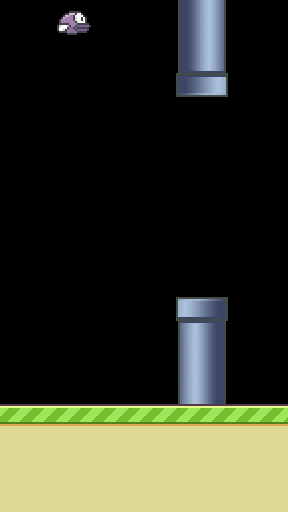

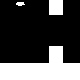

In [149]:
display(Image(filename='learner/logs/gifs/xep241_15042019133605.gif'))
display(Image(filename='learner/logs/gifs/xfmep241_15042019133605.gif'))

In [63]:
import os, json
import pandas as pd
from pprint import pprint

log_path = 'learner/logs/'
json_files = [fjson for fjson in os.listdir(log_path) if fjson.endswith('.json')]

# list of log file names
pprint(json_files)

['session_15042019144156.json', 'session_15042019235958.json']


In [65]:
# load each JSON file into a dataframe
df_list = [pd.read_json(log_path + f, ) for f in json_files[-1:]]

In [66]:
# combine the dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [67]:
display(df.sample(20))

did_abort              id  nb_steps  \
4111       True  15042019235958      7095   
2445       True  15042019235958      7095   
1544       True  15042019235958      7095   
2268       True  15042019235958      7095   
5594       True  15042019235958      7095   
3095       True  15042019235958      7095   
4945       True  15042019235958      7095   
275        True  15042019235958      7095   
3524       True  15042019235958      7095   
6749       True  15042019235958      7095   
828        True  15042019235958      7095   
3651       True  15042019235958      7095   
3455       True  15042019235958      7095   
433        True  15042019235958      7095   
6515       True  15042019235958      7095   
1080       True  15042019235958      7095   
1960       True  15042019235958      7095   
1866       True  15042019235958      7095   
6238       True  15042019235958      7095   
2741       True  15042019235958      7095   

                                                  steps  
4111  {'flap': False, 'durations': 0.043931245803833...  
2445  {'flap': False, 'durations': 0.043999671936035...  
1544  {'flap': False, 'durations': 0.059995651245117...  
2268  {'flap': True, 'durations': 0.044931173324584,...  
5594  {'flap': False, 'durations': 0.044939041137695...  
3095  {'flap': False, 'durations': 0.045960187911987...  
4945  {'flap': False, 'durations': 0.043965101242065...  
275   {'flap': False, 'durations': 0.005000114440917...  
3524  {'flap': False, 'durations': 0.044071197509765...  
6749  {'flap': True, 'durations': 0.0439994335174560...  
828   {'flap': False, 'durations': 0.004997253417968...  
3651  {'flap': False, 'durations': 0.042928218841552...  
3455  {'flap': False, 'durations': 0.044030904769897...  
433   {'flap': False, 'durations': 0.005940675735473...  
6515  {'flap': True, 'durations': 0.0459959506988520...  
1080  {'flap': False, 'durations': 0.041961193084716...  
1960  {'flap': True, 'durations': 0.0439646244049070...  
1866  {'flap': False, 'durations': 0.042999505996704...  
6238  {'flap': True, 'durations': 0.0440778732299800...  
2741  {'flap': True, 'durations': 0.0430033206939690...

#### Step Log Data

In [68]:
step_list = df.steps.apply(pd.Series)
df_steps = pd.concat([step_list])

In [69]:
f1 = [1.0, 0.0]
f2 = [0.0, 1.0]
r1 = [v == f1 for v in df_steps['action']]
r2 = [v == f2 for v in df_steps['action']]
df_steps.loc[r1, 'action'] = 0
df_steps.loc[r2, 'action'] = 1

In [70]:
metrics = df_steps.metrics
print(len(metrics))

7095


In [71]:
mets = []
for i, m in enumerate(metrics):
    mets.append(metrics[i][3:])
    if len(mets[i]) != 6: mets[i] = [None, None, None, None, None, None]
metric_names = ['accuracy', 'mse', 'precision', 'recall', 'f1', 'loss']

In [72]:
mets = [pd.Series(m, index=metric_names) for m in mets]

In [73]:
mets = pd.concat(mets, axis=1).transpose()
display(mets.head())

accuracy   mse precision recall    f1  loss
0     None  None      None   None  None  None
1     None  None      None   None  None  None
2     None  None      None   None  None  None
3     None  None      None   None  None  None
4     None  None      None   None  None  None

In [74]:
df_steps = pd.concat([df_steps.drop(['metrics'], axis=1), mets], axis=1)

In [75]:
df_steps.start = pd.to_datetime(df_steps.start, unit='s')
df_steps.end = pd.to_datetime(df_steps.end, unit='s')
df_steps.drop(['metrics_names', 'flap'], axis=1)

action   done  durations                           end  episode    mode  \
0          0  False   2.208493 2019-04-16 07:00:01.481314000        1    hard   
1          0  False   0.006058 2019-04-16 07:00:01.580374000        1    hard   
2          0  False   0.005976 2019-04-16 07:00:01.670318000        1    hard   
3          0  False   0.005991 2019-04-16 07:00:01.762373000        1    hard   
4          0  False   0.004986 2019-04-16 07:00:01.852319000        1    hard   
5          0  False   0.004998 2019-04-16 07:00:01.943314000        1    hard   
6          0  False   0.005041 2019-04-16 07:00:02.035375000        1    hard   
7          0  False   0.004999 2019-04-16 07:00:02.126316000        1    hard   
8          0  False   0.007003 2019-04-16 07:00:02.223318000        1    hard   
9          0  False   0.004960 2019-04-16 07:00:02.314318000        1    hard   
10         0  False   0.005964 2019-04-16 07:00:02.406316000        1    hard   
11         0  False   0.005021 2019-04-16 07:00:02.496373000        1    hard   
12         0  False   0.005000 2019-04-16 07:00:02.587384000        1    hard   
13         0  False   0.005000 2019-04-16 07:00:02.677315000        1    hard   
14         0  False   0.005044 2019-04-16 07:00:02.767385000        1    hard   
15         0  False   0.005003 2019-04-16 07:00:02.858316000        1    hard   
16         0  False   0.004999 2019-04-16 07:00:02.948316000        1    hard   
17         0  False   0.007002 2019-04-16 07:00:03.042317000        1    hard   
18         0  False   0.005032 2019-04-16 07:00:03.136373000        1    hard   
19         1  False   0.005030 2019-04-16 07:00:03.233346000        1    hard   
20         0  False   0.004965 2019-04-16 07:00:03.323351000        1    hard   
21         0  False   0.007056 2019-04-16 07:00:03.418373000        1    hard   
22         0  False   0.006002 2019-04-16 07:00:03.510318000        1    hard   
23         0  False   0.005045 2019-04-16 07:00:03.602378000        1    hard   
24         0  False   0.005000 2019-04-16 07:00:03.691315000        1    hard   
25         0  False   0.006000 2019-04-16 07:00:03.781317000        1    hard   
26         1  False   0.005000 2019-04-16 07:00:03.870315000        1    hard   
27         0  False   0.005024 2019-04-16 07:00:03.961375000        1    hard   
28         0  False   0.006002 2019-04-16 07:00:04.053318000        1    hard   
29         1  False   0.006001 2019-04-16 07:00:04.145352000        1    hard   
...      ...    ...        ...                           ...      ...     ...   
7065       0  False   0.044997 2019-04-16 07:18:07.610873000      224  medium   
7066       0  False   0.042999 2019-04-16 07:18:07.759902000      224  medium   
7067       0  False   0.045036 2019-04-16 07:18:07.908912000      224  medium   
7068       0  False   0.048068 2019-04-16 07:18:08.061943000      224  medium   
7069       0  False   0.046972 2019-04-16 07:18:08.212875000      224  medium   
7070       0  False   0.061061 2019-04-16 07:18:08.378936000      224  medium   
7071       0  False   0.044001 2019-04-16 07:18:08.526945000      224  medium   
7072       0  False   0.048960 2019-04-16 07:18:08.683872000      224  medium   
7073       0  False   0.043031 2019-04-16 07:18:08.832904000      224  medium   
7074       0  False   0.044069 2019-04-16 07:18:08.981943000      224  medium   
7075       0  False   0.044023 2019-04-16 07:18:09.129934000      224  medium   
7076       0  False   0.045060 2019-04-16 07:18:09.278934000      224  medium   
7077       0  False   0.048063 2019-04-16 07:18:09.429937000      224  medium   
7078       0  False   0.046033 2019-04-16 07:18:09.578943000      224  medium   
7079       0  False   0.043999 2019-04-16 07:18:09.731875000      224  medium   
7080       0  False   0.045020 2019-04-16 07:18:09.882910000      224  medium   
7081       0   True   0.044060 2019-04-16 07:18:10.030932000      224  medium   
7082       0  False   0.046004 2019-0

In [76]:
display(df_steps.sample(10))

action   done  durations                        end  episode   flap  \
2623       0  False   0.044068 2019-04-16 07:06:06.230287       82  False   
6931       0  False   0.052000 2019-04-16 07:17:45.684831      220  False   
1995       0  False   0.053002 2019-04-16 07:04:26.199404       61  False   
6299       0  False   0.043023 2019-04-16 07:16:01.436428      198  False   
4325       0  False   0.049039 2019-04-16 07:10:37.348463      133  False   
2073       1  False   0.047035 2019-04-16 07:04:38.848887       64   True   
1034       0  False   0.042935 2019-04-16 07:01:52.131834       30  False   
4854       0  False   0.044963 2019-04-16 07:12:04.464344      151  False   
6456       0  False   0.043931 2019-04-16 07:16:27.552154      204  False   
3938       0  False   0.045003 2019-04-16 07:09:33.408655      119  False   

     metrics_names    mode        reward  score         sess_id  \
2623        [loss]    easy  1.560976e-06      0  15042019235958   
6931        [loss]    hard  3.810976e-06      0  15042019235958   
1995        [loss]    hard  1.560976e-06      0  15042019235958   
6299        [loss]  medium  7.902439e-06      0  15042019235958   
4325        [loss]    hard -3.999979e-03      0  15042019235958   
2073        [loss]    easy  4.939024e-07      0  15042019235958   
1034        [loss]  medium  3.810976e-06      0  15042019235958   
4854        [loss]    easy  3.810976e-06      0  15042019235958   
6456        [loss]    easy  3.810976e-06      0  15042019235958   
3938        [loss]  medium  3.810976e-06      0  15042019235958   

                          start  step accuracy   mse precision recall    f1  \
2623 2019-04-16 07:06:06.186219    22     None  None      None   None  None   
6931 2019-04-16 07:17:45.632831    29     None  None      None   None  None   
1995 2019-04-16 07:04:26.146403    22     None  None      None   None  None   
6299 2019-04-16 07:16:01.393405    47     None  None      None   None  None   
4325 2019-04-16 07:10:37.299424    31     None  None      None   None  None   
2073 2019-04-16 07:04:38.801852    10     None  None      None   None  None   
1034 2019-04-16 07:01:52.088898    34     None  None      None   None  None   
4854 2019-04-16 07:12:04.419381    37     None  None      None   None  None   
6456 2019-04-16 07:16:27.508224    37     None  None      None   None  None   
3938 2019-04-16 07:09:33.363651    35     None  None      None   None  None   

      loss  
2623  None  
6931  None  
1995  None  
6299  None  
4325  None  
2073  None  
1034  None  
4854  None  
6456  None  
3938  None

In [78]:
# pickle the dataframe so we don't have to read the files each time
with open(r'learner/logs/log_analysis_v2.pkl', 'wb') as output_file:
    pickle.dump(df_steps, output_file)
output_file.close()

In [6]:
# reload the data from the pickled file to merge with newly generated log data
with open(r'learner/logs/log_analysis_v1.pkl', 'rb') as input_file:
    e = pickle.load(input_file)
input_file.close()

In [7]:
#display(len(df_steps))
display(len(e))

219031

In [9]:
print(trnc_rwd.sess_id.unique())

['15042019002738' '15042019095651' '15042019102307' '15042019120605'
 '15042019133605']


In [10]:
e.groupby(['sess_id']).mean()

action      done  durations      episode      flap  \
sess_id                                                                
15042019002738  0.116355  0.030619   0.045972  2195.487785  0.116355   
15042019095651  0.071719  0.030172   0.045981   125.141643  0.071719   
15042019102307  0.214584  0.032011   0.050039   313.446764  0.214584   
15042019120605  0.287464  0.032191   0.047176   448.250582  0.287464   
15042019133605  0.113825  0.029836   0.048951   280.084954  0.113825   

                  reward     score       step  
sess_id                                        
15042019002738  0.012778  0.092870  37.130733  
15042019095651  0.018326  0.127395  38.561782  
15042019102307  0.005493  0.047718  34.988319  
15042019120605  0.003109  0.035593  34.694668  
15042019133605  0.018147  0.122663  38.534737

In [11]:
e.groupby(['sess_id', 'episode']).mean().head()

action      done  durations      flap    reward  \
sess_id        episode                                                      
15042019002738 1        0.031250  0.031250   0.055995  0.031250 -0.001245   
               2        0.065217  0.021739   0.005848  0.065217 -0.000866   
               3        0.062500  0.062500   0.005685  0.062500 -0.002499   
               4        0.083333  0.083333   0.006072  0.083333 -0.003332   
               5        0.000000  0.047619   0.006182  0.000000 -0.001901   

                        score  step  
sess_id        episode               
15042019002738 1          0.0  34.5  
               2          0.0  26.5  
               3          0.0  41.5  
               4          0.0  43.5  
               5          0.0  39.0

C:\Anaconda3\envs\flap_rl\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


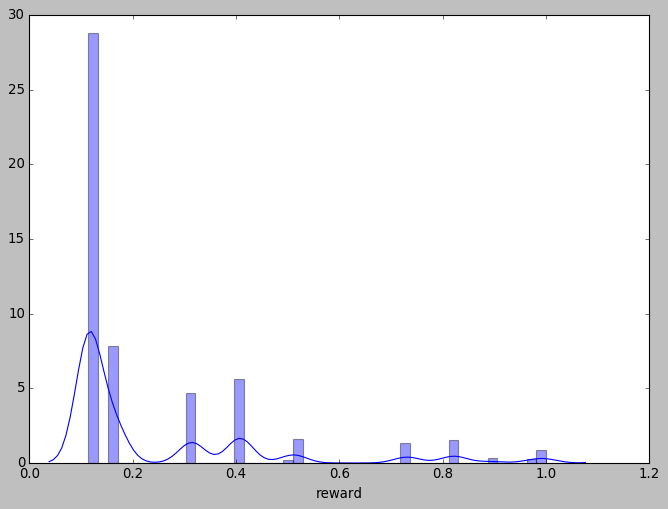

In [239]:
f, ax = plt.subplots(figsize=(10, 7))
#ax.set(xscale='log')
sns.distplot(trnc_rwd.reward, color='b', ax=ax)

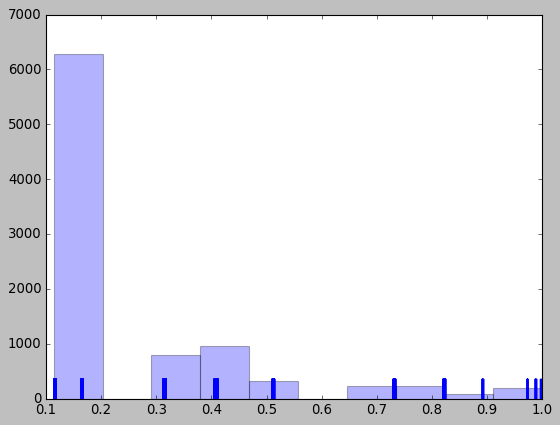

In [240]:
plt.hist(trnc_rwd.reward, alpha=.3)
sns.rugplot(trnc_rwd.reward)

In [249]:
display(e.head())

action   done  durations                        end  episode   flap  \
0       0  False   1.612931 2019-04-15 07:27:41.792632        1  False   
1       0  False   0.005039 2019-04-15 07:27:41.887672        1  False   
2       0  False   0.004999 2019-04-15 07:27:41.983634        1  False   
3       0  False   0.004999 2019-04-15 07:27:42.079634        1  False   
4       0  False   0.006000 2019-04-15 07:27:42.176630        1  False   

  metrics_names  mode    reward  score         sess_id  \
0        [loss]  easy  0.000002      0  15042019002738   
1        [loss]  easy  0.000002      0  15042019002738   
2        [loss]  easy  0.000002      0  15042019002738   
3        [loss]  easy  0.000002      0  15042019002738   
4        [loss]  easy  0.000002      0  15042019002738   

                       start  step accuracy   mse precision recall    f1  loss  
0 2019-04-15 07:27:40.179701    19     None  None      None   None  None  None  
1 2019-04-15 07:27:41.882633    20     None  None      None   None  None  None  
2 2019-04-15 07:27:41.978635    21     None  None      None   None  None  None  
3 2019-04-15 07:27:42.074635    22     None  None      None   None  None  None  
4 2019-04-15 07:27:42.170630    23     None  None      None   None  None  None

In [18]:
#sns.countplot(x=e.columns.values, data=e.count());

In [112]:
# pickle the dataframe so we don't have to read the files each time
with open(r'learner/logs/log_analysis_v1.pkl', 'wb') as output_file:
    pickle.dump(e, output_file)
output_file.close()

In [125]:
df_grpd = e.groupby(['sess_id', 'episode'])

In [8]:
trnc_rwd = e[e.reward > .11]

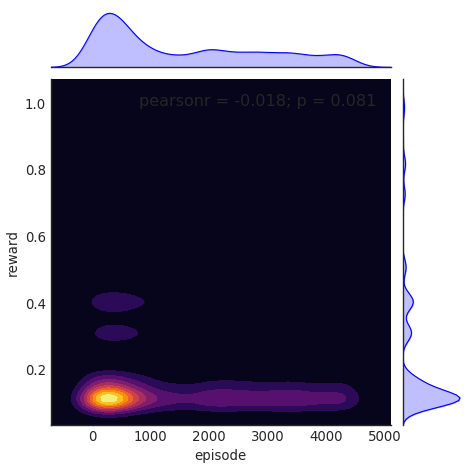

In [15]:
with sns.axes_style('white'):
    sns.jointplot('episode', 'reward', trnc_rwd, kind='kde', cmap='inferno')

In [91]:
loss = e.loss
acc = e.accuracy
mse = e.mse
precision = e.precision
recall = e.recall
f1 = e.f1

display(f1.mean())

0.0

In [3]:
import cv2
import imageio
from keras.models import Model
from learner.flappy_beta import BetaFlapDQN, NeuralNet
import tensorflow as tf
from tensorflow import Session, InteractiveSession

sess = tf.Session()
model = NeuralNet(sess)
#sess.close()
model = model.nn

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)


frame = 'C:\\Users\\dooki\\Documents\\BetaFlapZero\\images\\test_frame.png'
im = imageio.imread(frame)
x_t = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
x_t = cv2.resize(x_t, (80, 80))
x_t = cv2.threshold(x_t, 1, 255, cv2.THRESH_BINARY)[1]
x_t = np.stack([x_t, x_t, x_t, x_t], axis=0)
x_t = np.reshape(x_t, (1, *x_t.shape))

activations = activation_model.predict(x_t)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        

InvalidArgumentError: input_1:0 is both fed and fetched.

In [115]:
display(len(e))

219031